1.6 Квартили распределения и график box-plot

Квантили - делят упорядоченные данные на некоторое число равных частей


Квартили - частный случай квантилей, делят данные на 4 равные части

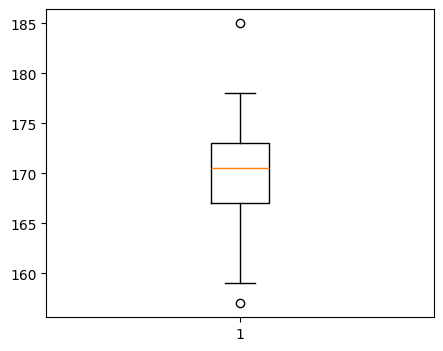

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# желтая линия - 2 квартиль(медиана) = (170+171) / 2 = 170.5
# нижняя часть "коробки" - 1 квартиль - 167
# верхняя часть "коробки - 3 квартиль - 173
# 159 - 1.5 межквартильного размаха "вниз"
# 179 - 1.5 межквартильного размаха "вверх"
# 157, 185 - выбросы
data = np.array([157, 159, 161, 164, 165, 166, 167, 167, 167, 168, 169, 169, 170, 170, 170,
                 171, 171, 172, 172, 172, 172, 173, 173, 175, 175, 177, 178, 178, 178, 185])
    
fig = plt.figure(figsize =(5, 4))
plt.boxplot(data)
 
plt.show()

Желтая линия - медиана (2ой квартиль)

Верхняя граница "коробки" - 3ий квартиль

Нижняя граница - 1ый квартиль

Расстояние между 1 и 3 квартилями - 50% всех наблюдений, или межквартильный размах. Чем больше такой размах, тем больше вариативность признака.

1.7 Нормальное распределение

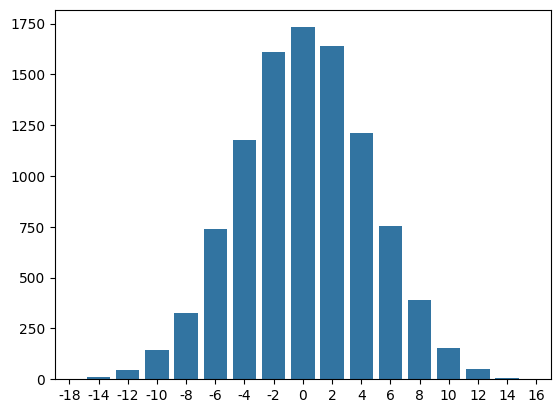

In [33]:
import seaborn as sns

data = dict()
# количество шариков
N = 10000
# количество уровней
level = 20
for _ in range(N):
    index = 0
    for _ in range(level):
        index += np.random.choice([-1, 1])
    data.setdefault(index, 0)
    data[index] += 1
sns.barplot(x=list(data.keys()), y=list(data.values()));

Правило трех сигм - в соответствии с вероятностным законом:


68% всех наблюдений находятся в диапазоне +-σ (могут удаляться от среднего на расстояние в одну сигму)

95% всех наблюдений находятся в диапазоне +-2σ

99% всех наблюдений находятся в диапазоне +-3σ

Z-шкала 

![alt text](download.png)

Z-шкала позволяет оценить, насколько далеко отдельно взятое наблюдение лежит от выборочного среднего, в единицах стандартного отклонения. (Под расстоянием подразумевается разница числовых значений) 


Соответственно, если z-score меньше 0, наблюдение меньше выборочного среднего и в распределении лежит слева от него. Если z-score равно 0, значит данное наблюдение совпадает с выборочным средним

In [34]:
"""Допустим, что некоторый признак распределен нормально, выборочное среднее
   равняется 100, а дисперсия равняется 25 (M = 100, D = 25).
   Тогда приблизительно 95% всех наблюдений находится в диапазоне:"""

M = 100
D = 25
sd = D**0.5
# Поскольку 95% от всех значений находятся в диапазоне +-2σ, то мин/макс занчения z = +-2
z_min = -2
z_max = 2

# z = (x-M)/sd
x_min = z_min*sd + M
x_max = z_max*sd + M
print('Приблизительно 95% всех наблюдений находится в диапазоне ', [x_min, x_max])

Приблизительно 95% всех наблюдений находится в диапазоне  [90.0, 110.0]


In [35]:
from scipy import stats
"""Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение
   со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
   Какой приблизительно процент людей обладает IQ > 125?"""

M = 100
sd = 15
x_min = 125

z = (x_min - M) / sd 
print("Процент людей с IQ выше 125 =", round((1 - stats.norm.cdf(z)) * 100))

Процент людей с IQ выше 125 = 5


In [36]:
"""Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение
   со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
   Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112?"""

M = 100
sd = 15

x_min = 70
x_max = 112

z_min = (x_min - M) / sd
z_max = (x_max - M) / sd

print("Процент людей с IQ выше 70 и ниже 112 =", round((1 - stats.norm.cdf(z_min)) * 100 - 
                                                       (1 - stats.norm.cdf(z_max)) * 100))

Процент людей с IQ выше 70 и ниже 112 = 77


1.8 Центральная предельная теорема

Данная теорема гласит, что множество выборочных средних случайно взятых из некой ГС выборок (ГС не обязательно иметь нормальное распределение) всегда будет распределено нормально, при этом среднее значение всех таких средних будет близко к среднему генеральной совокупности, а стандартной отклонение sd таких средних будет называть standard error (se). 

Зная стандартное отклонение ГС и размер выборки (у всех выборок размер одинаковый) можно посчитать se:

![alt text](download-1.png)

Если размер выборок больше 30, и она является репрезентативной, то вместо стандартного отклонения ГС берется стандартное отклонение выборки:

![alt text](download-2.png)

<Axes: ylabel='Frequency'>

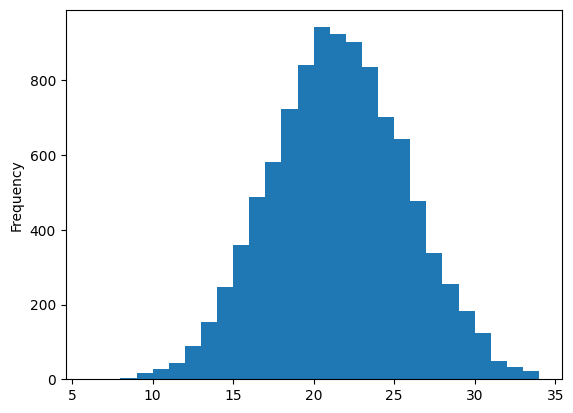

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
# Формирование ГС
# значения игральной кости
dice = [1, 2, 3, 4, 5, 6]
# количество бросков кости
count = 6
# размер ГС
# sp - Statistical population - генеральная совокупность
sp_size = 10000
sp = pd.Series(dtype=np.int64, index=range(sp_size))
for i in range(sp_size):
    value = 0
    for _ in range(count):
        value += np.random.choice(dice)
    sp[i] = value

sp.plot.hist(bins=28)

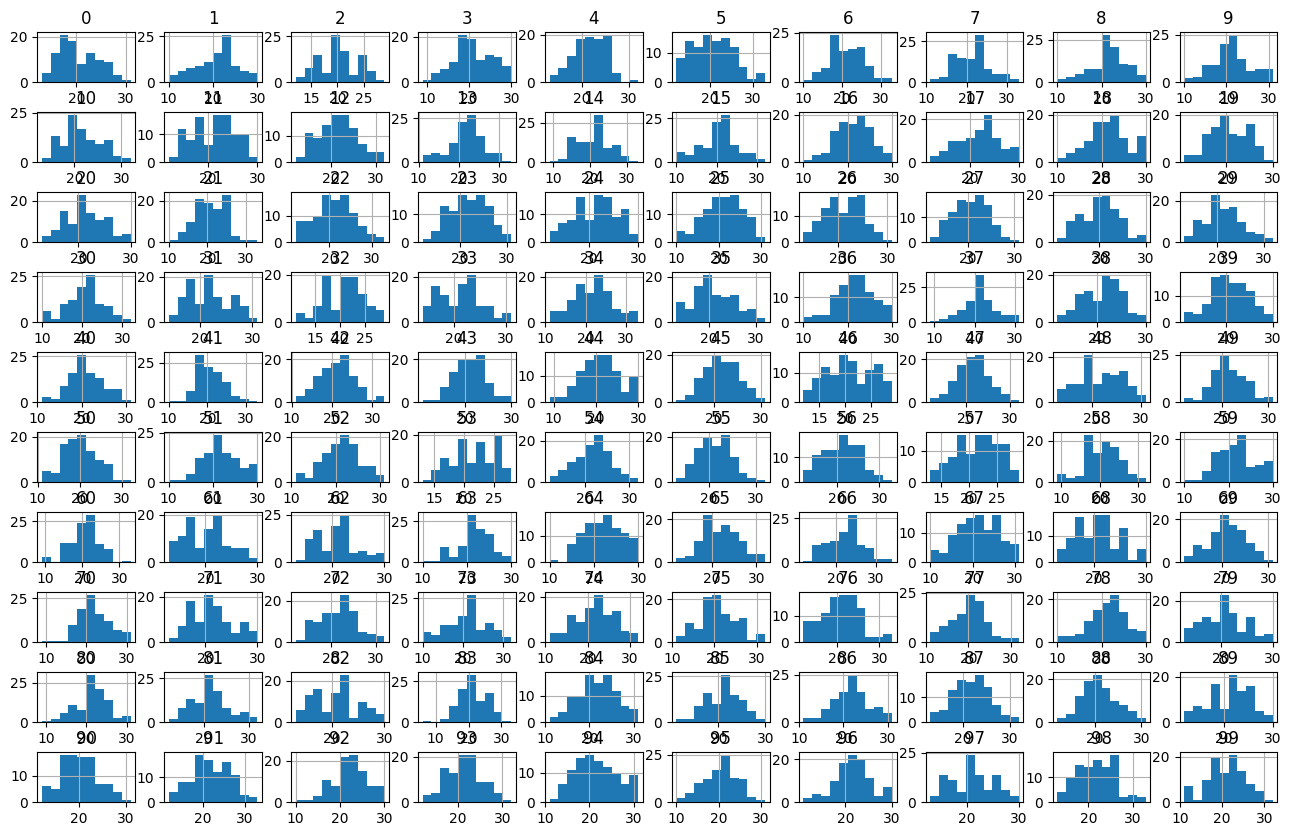

In [38]:
"""Распределение выборочных средних является нормальным, со средним =(стремящимся к) среднему зачению в ГС"""
# формирование выборок из ГС
# количество выборок
samples_count = 100
# размер выборки
sample_size = 100
samples = pd.DataFrame([[np.random.choice(sp) for _ in range(sample_size)] for __ in range(samples_count)]).T

samples.hist(figsize=(16, 10), sharex=0)
plt.subplots_adjust(hspace = 0.6)

In [39]:
means = samples.mean()
print('Cреднее ГС:', sp.mean(), '; Cреднее средних выборок:',  means.mean())
print('Разница:', abs(means.mean() - sp.mean()), '; Стандартная ошибка среднего:', means.std())

Cреднее ГС: 21.0685 ; Cреднее средних выборок: 21.095
Разница: 0.026499999999998636 ; Стандартная ошибка среднего: 0.4392383214501017


Что если взять произвольную выборку?

In [40]:
# произвольная выборка 
sample = samples[42]
print('sample mean:', sample.mean())
print('sample std:', sample.std())
print('sample se: ', sample.std()/math.sqrt(sample.size))

sample mean: 21.12
sample std: 4.411371897743606
sample se:  0.44113718977436056


In [41]:

"""Рассчитайте стандартную ошибку среднего, если выборочное среднее равняется 10, дисперсия 4, при N = 100"""
M = 10
D = 4
N = 100

sd = D**0.5
se = sd / N**0.5
print('Стандартная ошибка среднего =', se)

Стандартная ошибка среднего = 0.2


1.9 Доверительные интервалы для среднего

CI (confidence interval) - в общем случае интервал, в пределах которого с заданной вероятностью лежат выборочные оценки статистических характеристик ГС.

Например, доверительный интервал для среднего. Стоит упомянуть, что такой интервал строится для выборочного среднего, не для генерального (очевидно). Нельзя точно знать среднее ГС, зная только среднее некой выборки, взятой из ГС. Но можно сказать, в каком интервале, с заданной вероятностью, лежит среднее ГС.


In [42]:
"""Рассчитайте 99% доверительный интервал для следующего примера: """
# при заданной вероятности 99%, необходимо 2.58 сигм, чтобы охватить эти самые 99% интервалом
x_mean = 10
sd = 5
N = 100

se = sd / N**0.5 # стандартная ошибка для данного выборочного среднего
print("99% Доверительный интервал ", [x_mean - 2.58*se, x_mean + 2.58*se])

99% Доверительный интервал  [8.71, 11.29]


In [43]:
"""Вычисление sigma c помощью scipy"""
from scipy import stats

# 95%
p = 0.95
# так как интервал двухсторонний , выполняется вычисление
alpha = (1-p)/2
# isf - Inverse survival function (inverse of sf) 
print(f'{stats.norm().isf(alpha):.2f} sigma')

# 99%
p = 0.99
alpha = (1-p)/2
print(f'{stats.norm().isf(alpha):.2f} sigma')

1.96 sigma
2.58 sigma


In [44]:
"""Решение задачи с помощью scipy
   Рассчитайте 99% доверительный интервал для следующего примера: 
   среднее = 10, стандартное отклонение = 5, размер выборки = 100."""

from scipy import stats

p = 0.99
x_mean = 10
sd = 5
N = 100

# стандарная ошибка среднего
se = sd / N**0.5

# sigma
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)

# доверительный интервал
сonfidence_interval = x_mean - sigma*se, x_mean + sigma*se

print('[%.2f, %.2f]' % сonfidence_interval)

[8.71, 11.29]


1.10 p-уровень значимости

Во время исследований, неизбежно приходится выдвигать гипотезы и опровергать их. Это основной способ проведения исследований впринципе. Оценить какая гипотеза будет наиболее правильной, помогает p-уровень значимости, который по сути является вероятностью события, при допущении, что верна гипотеза H0.

Например:


Пусть известно, что на выздоровление при неком заболевании в среднем уходит 20 дней. Допустим, что был разработан некий препарат, и его испытали на 64 людях. Среднее время выздоровления оказалось 18.5, стандартное отклонение - 4. Значимое ли наблюдение мы получили? Принадлежит ли выборка из 64 человек к старой ГС (тех, кого не лечили препаратом и кто выздоравливает за 20 дней) или все же к новой ГС (тех, кому препарат помог и кто выздоравливает быстрее)

In [45]:
M = 20 # среднее ГС тех, кого не лечат препаратом
N = 64
x_mean = 18.5
sd = 4

Введем две гипотезы. H0 - препарат никакого эффекта не дает, наблюдение не значимое. H1 - препарат действительно сокращает срок выздоровления, наблюдение статистически значимое

Пусть верна гипотеза H0. Тогда выборка из 64 человек принадлежит старой ГС, среднее которой равно 20. Согласно ЦПТ (центральной предельной теореме), если многократно проводить эксперимент, т.е. извлекать из старой ГС выборки по 64 человека, их выборочные средние будут распределены нормально вокруг генерального среднего, равного 20, а стандартная ошибка будет равна стандартному отклонению, разделенному на корень из N

In [46]:
se = sd / N ** 0.5

Вычислим, насколько далеко полученное x_mean отклонилось от M в единицах стандартного отклонения (т.к. мы работаем в рамках ГС, se = sd)

In [47]:
z = (x_mean - M) / se
print(z)

-3.0


Посмотрим на распределение

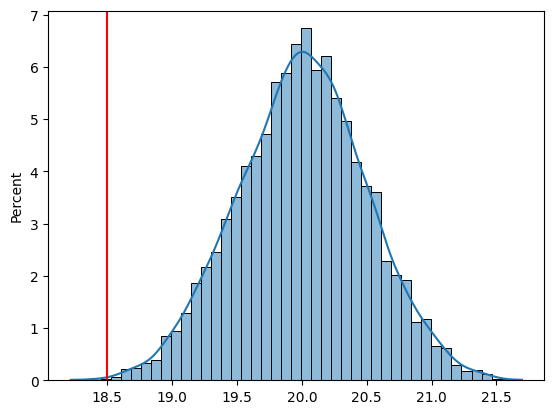

In [50]:
means = np.random.normal(M, se, 5000)
sns.histplot(data=means, kde=True, stat='percent')
plt.axvline(18.5, color='red')

Будем извлекать из means выборочное среднее, многократно. Посчитаем, какова частота наблюдений, лежащих вне интервала (18.5, 21.5), тоесть насколько часто происходит так, что выборочное среднее какого либо из множества проведенных экспериментов, равно 18.5 или даже меньше (отклонилось от среднего ГС на 3 или более сигмы)

In [49]:
results = []
for _ in range(100000):
    value = np.random.choice(means, size=1)
    results.append(18.5 < value < 21.5) 
inside_interval = results.count(True) / len(results)

print(f"частота наблюдений в интервале = {inside_interval}")
print(f"частота наблюдений вне интервала = {1 - inside_interval}")

частота наблюдений в интервале = 0.99775
частота наблюдений вне интервала = 0.0022499999999999742


Таким образом, при условии, что верна гипотеза H0 и выборка испытуемых принадлежит исходной ГС, вероятность получить исход, при котором время выздоровления равно 18.5 а отклонение 4, или выборку с большим отклонением, составит ~0.002 (две тысячных!)

А значит, гипотезу H0 нужно отвергнуть в пользу гипотезы H1

Существует также альтернативный способ проверить гипотезы - доверительный интервал

Задача будет немного переформулирована - нам нужно оценить, лежит ли в доверительном интервале, рассчитанном по выборочным данным, предпологаемое среднее значение ГС с заданной вероятностью. В нашем случае, достаточно рассчитать 95% доверительный интервал. Если предпологаемое среднее значение ГС не будет лежать в таком интервале, у нас будет достаточно оснований отклонить гипотезу H0 (Это будет означать, что выборка, по которой считали интервал, принадлежит к другой ГС, в частности к совокупности тех, кому препарат действительно помогает)

In [56]:
p = 0.95

alpha = (1-p) / 2
sigma = stats.norm().isf(alpha)

CI = x_mean - sigma * se, x_mean + sigma * se
if M in CI:
    print("20 принадлежит доверительному интервалу [%.2f, %.2f] - принимаем H0" % CI)
else:
    print("20 не принадлежит доверительному интервалу [%.2f, %.2f] — отклоняем Н0" % CI)


20 не принадлежит доверительному интервалу [17.52, 19.48] — отклоняем Н0
